In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

# Loading Data

## Here first we will load train data

In [5]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# EDA using builtin function

In [6]:

# Exploratory Data Analysis
def libraries():
    global pd,np
    import pandas as pd
    import numpy as np
def load():
    global df
    df=pd.read_csv('train.csv')
    
def top_rows(value):
    print('\033[1m'+ 'displaying the', value, 'rows from top'+'\033[0m')
    a=df.head(value)
    print(a,'\n')
    
def bottom_rows(value):
    print('\033[1m'+'displaying the', value, 'rows from bottom'+'\033[0m')
    b=df.tail(value)
    print(b,'\n')
    
def rows_columns():
    print('\033[1m'+'Shape of the Data set'+'\033[0m')
    c=df.shape
    print(c,'\n')
    
def col_names():
    print('\033[1m'+'Column Names in the Data set'+'\033[0m')
    d=df.columns
    print(d,'\n')
    
def information():
    print('\033[1m'+'Quick Overview of DataSet(info)'+'\033[0m')
    e = df.info()
    print(e,'\n')

def sizee():
    print('\033[1m'+'No.of Elements in the DataSet'+'\033[0m')
    f = df.size
    print(f,'\n')

def ndimension():
    print('\033[1m'+'Dimensions in your dataframe'+'\033[0m')
    g = df.ndim
    print(g,'\n')
    
def stats_summary():
    print('\033[1m'+'Staistical Summary of DataSet'+'\033[0m')
    h = df.describe()
    print(h,'\n')
    
def null_values():
    print('\033[1m'+'Number of Missing values in each column'+'\033[0m')
    i = df.isnull().sum()
    print(i,'\n')
    
def n_unique():
    print('\033[1m'+'Number of unique elements'+'\033[0m')
    j = df.nunique()
    print(j,'\n')
    
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')
    k = df.memory_usage()
    print(k,'\n')
    
def is_na(value):
    print('\033[1m'+'Dataframe filled with boolean values with true indicating missing values'+'\033[0m')
    l = df.isna().head(value)
    print(l,'\n')
    
def duplicate():
    print('\033[1m'+'Boolean Series denoting duplicate rows'+'\033[0m')
    m = df.duplicated().sum()
    print(m,'\n')
    
def valuecounts():
    print('\033[1m'+'Series containing count of unique values'+'\033[0m')
    n = df.value_counts()
    print(n,'\n')

def datatypes():
    print('\033[1m'+'Datatype of each column'+'\033[0m')
    o = df.dtypes
    print(o,'\n')
    
def correlation():
    print('\033[1m'+'Correalation between all columns in DataFrame'+'\033[0m')
    p = df.corr()
    print(p,'\n')
    
def nonnull_count():
    print('\033[1m'+'Count of non-null values'+'\033[0m')
    q = df.count()
    print(q,'\n')
    
def eda():
    load()
    value= 5 
    datatypes()
    top_rows(value)
    bottom_rows(value)
    rows_columns()
    col_names()
    information()
    sizee()
    ndimension()
    stats_summary()
    null_values()
    n_unique()
    memory_use()
    is_na(value)
    nonnull_count()
    duplicate()
    valuecounts()
    correlation()
    
    
    
        
def stats_u(data,col):
    if data[col].dtype == "float64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        max_value = data[col].max()
        print('Maximum value of',col,'column',max_value)
        min_value = data[col].min()
        print('Minimum value of',col,'column',min_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
            
    elif data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print("Outliers are:")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
    else:
        print(col,'has Qualitative Data')
        z = df[col].mode()
        print('mode of',col,'column:\n',z)
        print('Count of mode is:\n',df[col].value_counts())
        print('Unique strings in',col,'are',data[col].nunique())
        if(data[col].nunique() == 1):
            print(col,'has same string')
        elif(data[col].nunique() == 2):
            print(col,'has binary strings')
        else:
            print(col,'has multi stings')


libraries()
eda()

print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of DataSet'+'\033[0m')
print('\033[1m'+'DataTypes in the DataSet:\n'+'\033[0m',df.dtypes)
print('\033[1m'+'Columns in DataSet:'+'\033[0m',df.columns)
print('\033[1m'+'Shape of DataSet:'+'\033[0m',df.shape)
print('\033[1m'+'Size of DataSet:'+'\033[0m',df.size)
print('\033[1m'+'Dimension of DataSet:'+'\033[0m',df.ndim)
print('\033[1m'+'Total Memory used in DataSet:'+'\033[0m',df.memory_usage().sum())
print('\033[1m'+'Total Number of missing values in DataSet:'+'\033[0m',df.isnull().sum().sum())
print('\033[1m'+'Total Number of Unique values in DataSet:'+'\033[0m',df.nunique().sum())
print('\033[1m'+'Total Number of non null values in DataSet:'+'\033[0m',df.count().sum())
print('\033[1m'+'Total Number of duplicate rows in DataSet:'+'\033[0m',df.duplicated().sum())
print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of Each Colomn'+'\033[0m')
print("\n")
cols=df.columns
cols
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(df,i)
    print("\n")
            

Datatype of each column
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object 

displaying the 5 rows from top
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...       

Index              128
Id               11680
MSSubClass       11680
MSZoning         11680
LotFrontage      11680
                 ...  
MoSold           11680
YrSold           11680
SaleType         11680
SaleCondition    11680
SalePrice        11680
Length: 82, dtype: int64 

Dataframe filled with boolean values with true indicating missing values
      Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  False       False     False        False    False   False   True     False   
1  False       False     False        False    False   False   True     False   
2  False       False     False        False    False   False   True     False   
3  False       False     False        False    False   False   True     False   
4  False       False     False        False    False   False   True     False   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0        False      False  ...     False    True   True         True    False  

Summary Of Each Colomn


Id
Id has Quantitative data
mean of Id column 730.5
median of Id column 730.5
standard deviation of Id column 421.6100093688479
quartile 1 of Id column is 366
quartile 2 of Id column is 731
quartile 3 of Id column is 1095
quartile 4 of Id column is 1460
Lower Limit Point: -727.5
Upper Limit Point: 2188.5
No outliers


MSSubClass
MSSubClass has Quantitative data
mean of MSSubClass column 56.897260273972606
median of MSSubClass column 50.0
standard deviation of MSSubClass column 42.30057099381035
quartile 1 of MSSubClass column is 20
quartile 2 of MSSubClass column is 50
quartile 3 of MSSubClass column is 70
quartile 4 of MSSubClass column is 190
Lower Limit Point: -55.0
Upper Limit Point: 145.0
There are outliers
Outliers are:
Series([], Name: MSSubClass, dtype: int64)
9       190
48      190
56      160
75      180
87      160
       ... 
1378    160
1393    190
1416    190
1449    180
1452    180
Name: MSSubClass, Length: 103, dtype: int64


MSZoning
MSZoning 

quartile 2 of BsmtFinSF1 column is 384
quartile 3 of BsmtFinSF1 column is 712
quartile 4 of BsmtFinSF1 column is 5644
Lower Limit Point: -1068.0
Upper Limit Point: 1780.0
There are outliers
Outliers are:
Series([], Name: BsmtFinSF1, dtype: int64)
53      1810
70      1880
178     1904
523     2260
898     2188
1182    2096
1298    5644
Name: BsmtFinSF1, dtype: int64


BsmtFinType2
BsmtFinType2 has Qualitative Data
mode of BsmtFinType2 column:
 0    Unf
dtype: object
Count of mode is:
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unique strings in BsmtFinType2 are 6
BsmtFinType2 has multi stings


BsmtFinSF2
BsmtFinSF2 has Quantitative data
mean of BsmtFinSF2 column 46.54931506849315
median of BsmtFinSF2 column 0.0
standard deviation of BsmtFinSF2 column 161.31927280654057
quartile 1 of BsmtFinSF2 column is 0
quartile 2 of BsmtFinSF2 column is 0
quartile 3 of BsmtFinSF2 column is 0
quartile 4 of BsmtFinSF2 column is 1474
Lower 

Lower Limit Point: -0.5
Upper Limit Point: 3.5
No outliers


HalfBath
HalfBath has Quantitative data
mean of HalfBath column 0.38287671232876713
median of HalfBath column 0.0
standard deviation of HalfBath column 0.5028853810928973
quartile 1 of HalfBath column is 0
quartile 2 of HalfBath column is 0
quartile 3 of HalfBath column is 1
quartile 4 of HalfBath column is 2
Lower Limit Point: -1.5
Upper Limit Point: 2.5
No outliers


BedroomAbvGr
BedroomAbvGr has Quantitative data
mean of BedroomAbvGr column 2.8664383561643834
median of BedroomAbvGr column 3.0
standard deviation of BedroomAbvGr column 0.8157780441442212
quartile 1 of BedroomAbvGr column is 2
quartile 2 of BedroomAbvGr column is 3
quartile 3 of BedroomAbvGr column is 3
quartile 4 of BedroomAbvGr column is 8
Lower Limit Point: 0.5
Upper Limit Point: 4.5
There are outliers
Outliers are:
53      0
189     0
634     0
1163    0
1213    0
1270    0
Name: BedroomAbvGr, dtype: int64
118     5
137     5
144     6
198     5
291     6

# Exploratory Data Analysis

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
df.shape

(1460, 81)

In [10]:
df.size

118260

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [17]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [18]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [19]:
# Droping thesee columns since they have many null values
df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis = 1,inplace = True)

In [20]:
# Column with null values and their count
c = 0
is_null = []
for i in df.columns:
    if df[i].isnull().sum()>0:
        is_null.append(i)
        print(i,df[i].isnull().sum())
        c = c+1
print('Number of columns containing null values are:',c)

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
Number of columns containing null values are: 14


In [21]:
# 38 categorical columns
obj = []
for i in df.columns:
    if df[i].dtypes == 'object':
        obj.append(i)
obj#categorical column list

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Data Visualisation

In [22]:
# count of categories in categorical columns
for i in obj:
    print(df[i].value_counts())
    print('-----------------------------------------------------')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----------------------------------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst    

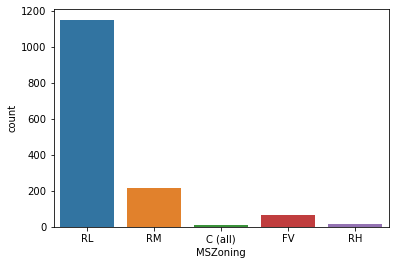

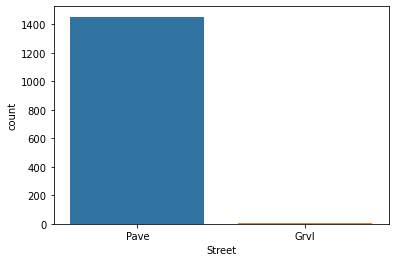

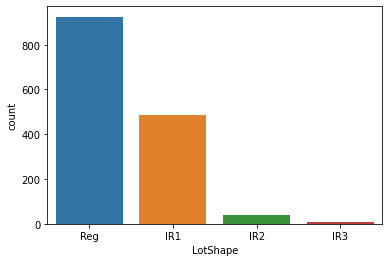

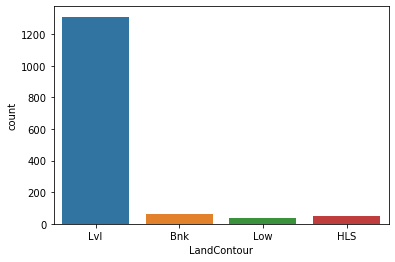

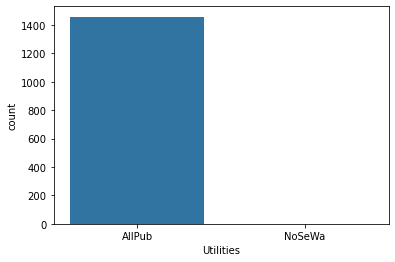

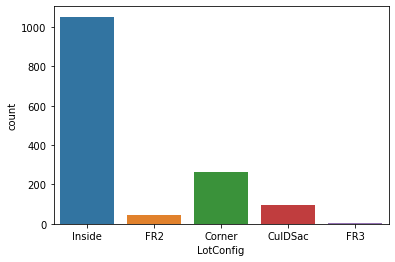

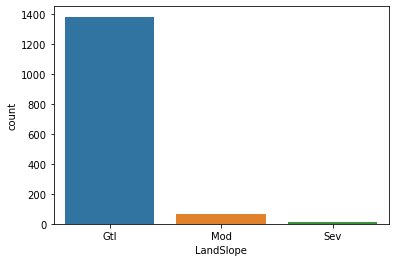

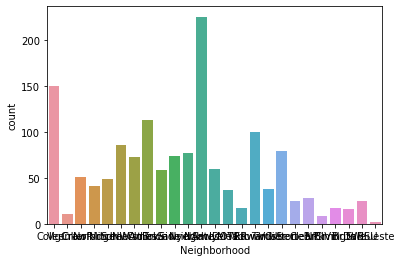

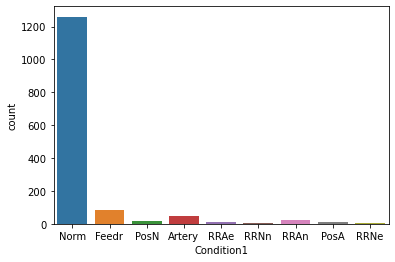

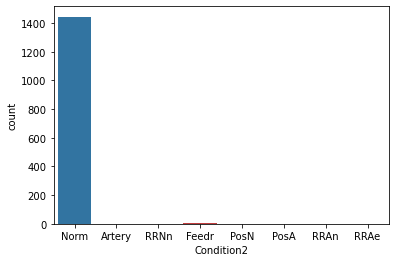

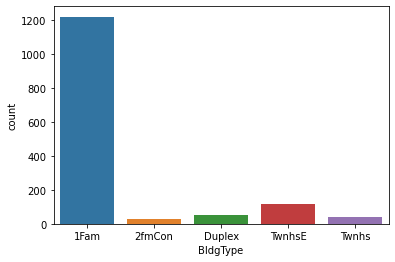

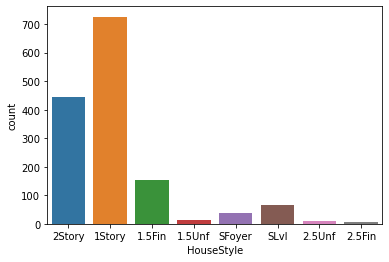

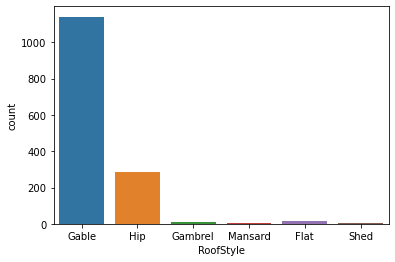

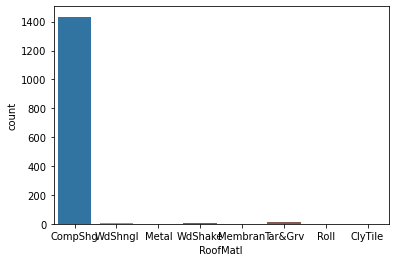

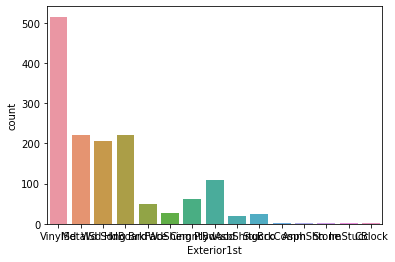

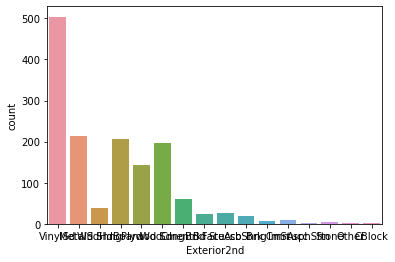

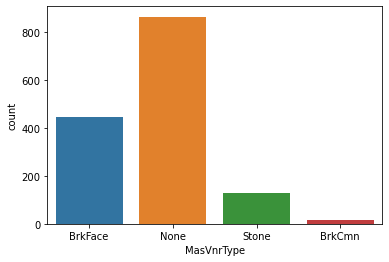

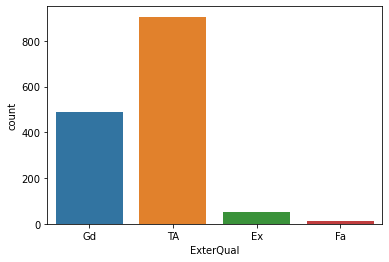

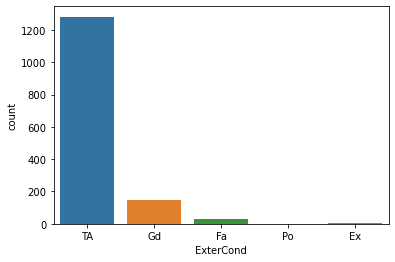

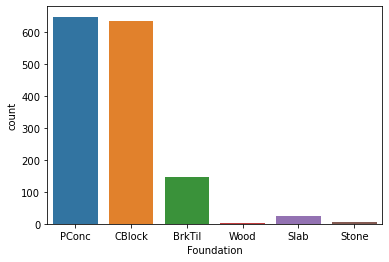

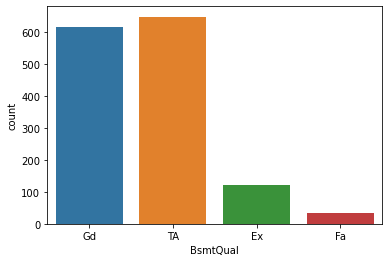

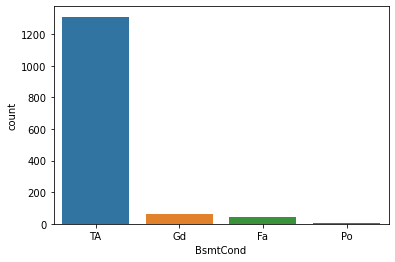

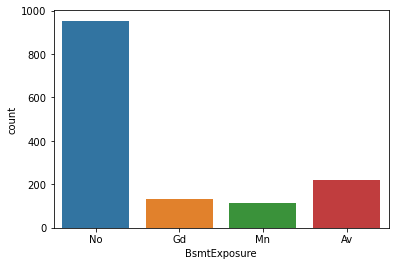

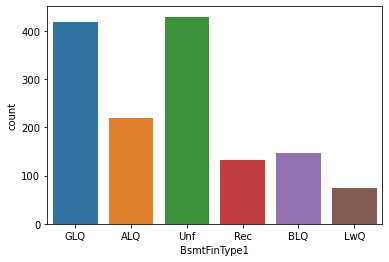

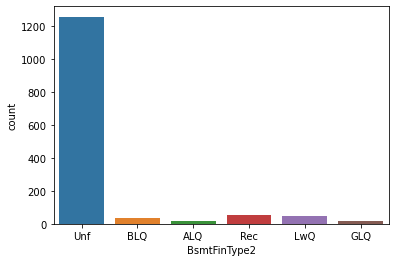

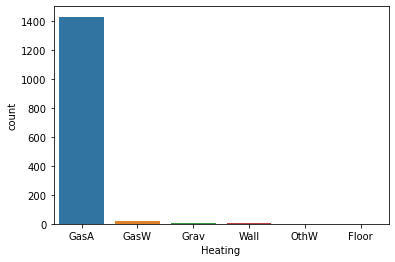

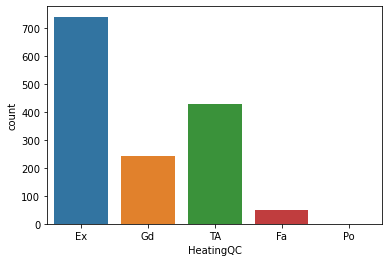

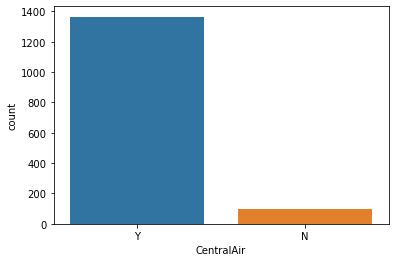

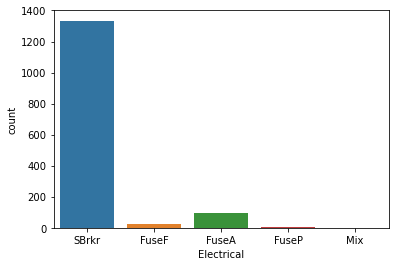

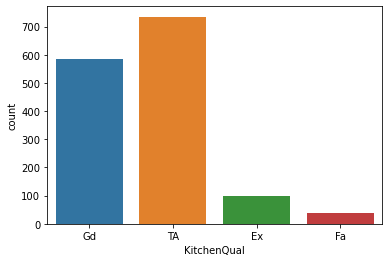

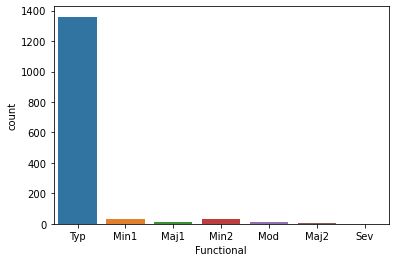

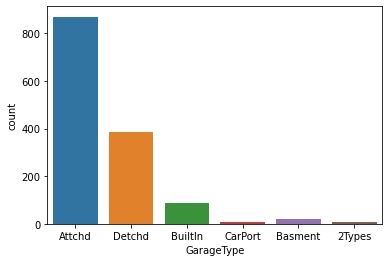

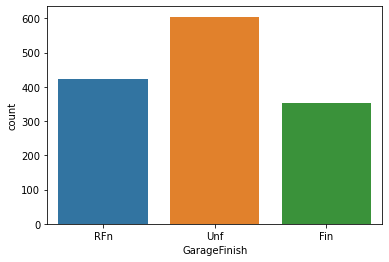

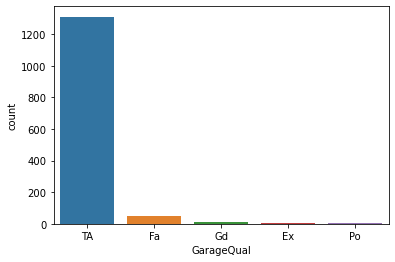

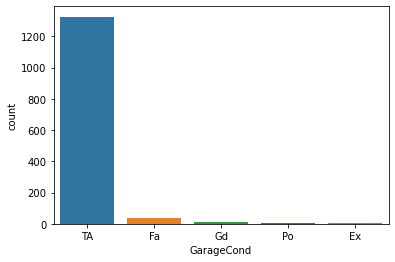

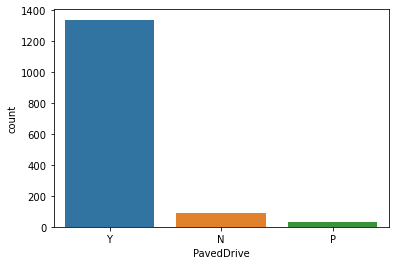

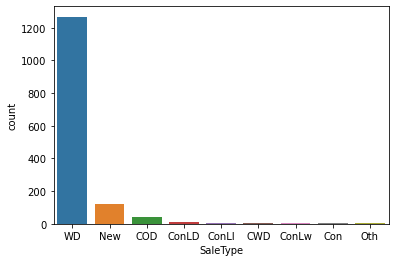

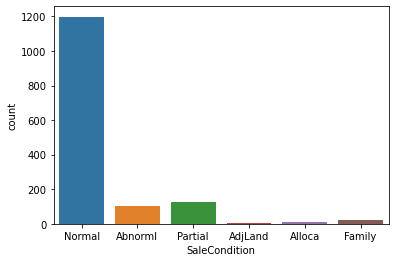

In [23]:
# count plot of categorical values in each column
for i in obj:
    sns.countplot(x = i ,data=df)
    plt.show()

### Target variable vs all categorical columns

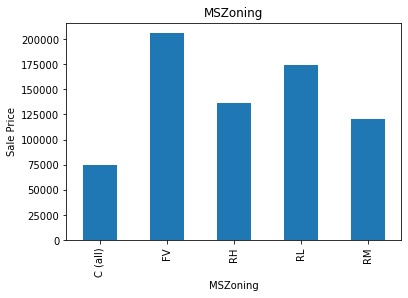

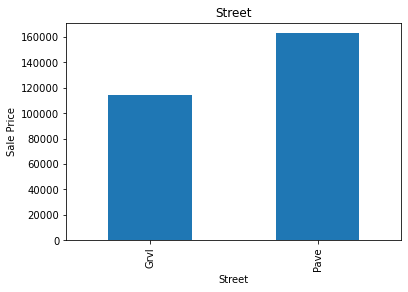

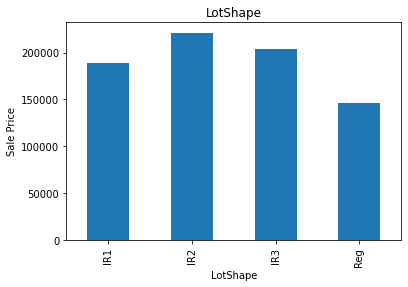

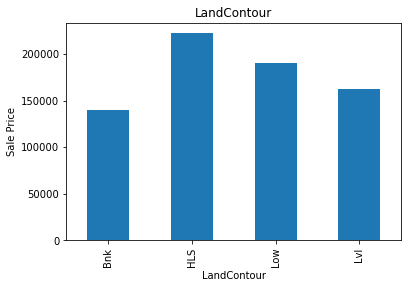

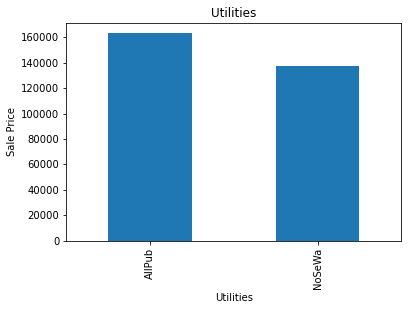

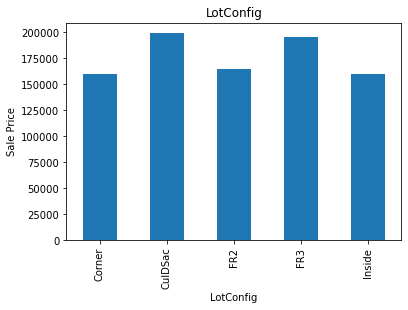

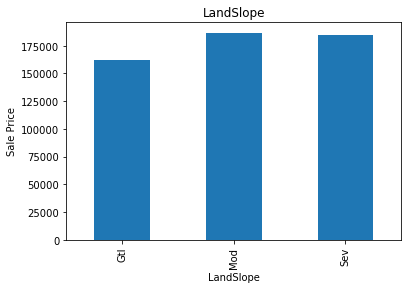

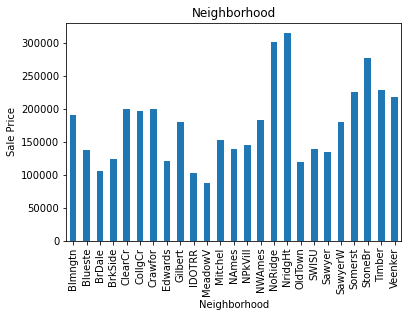

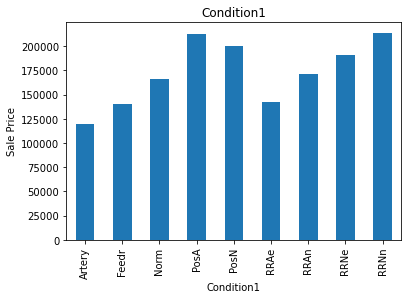

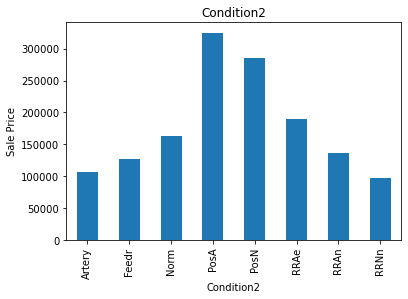

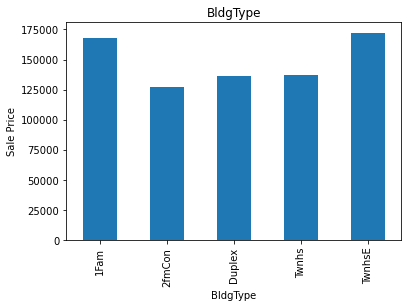

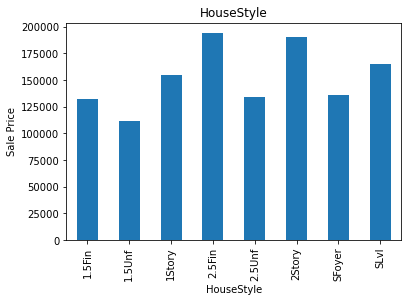

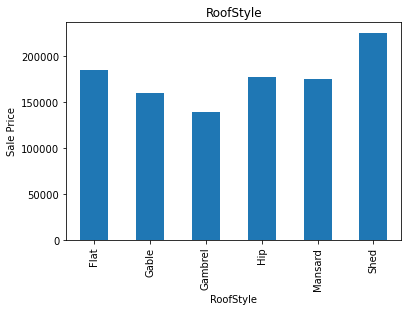

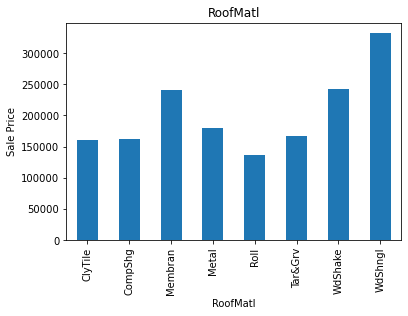

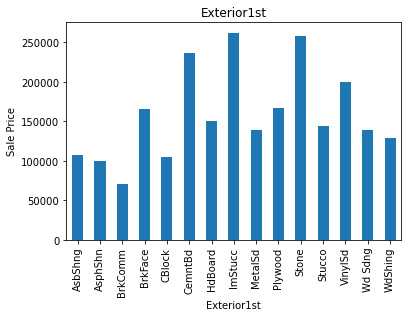

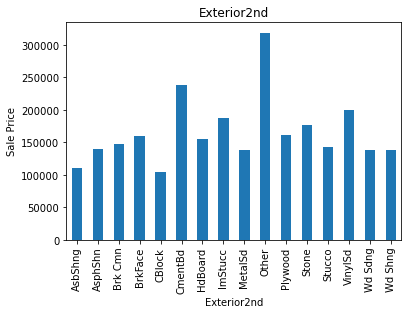

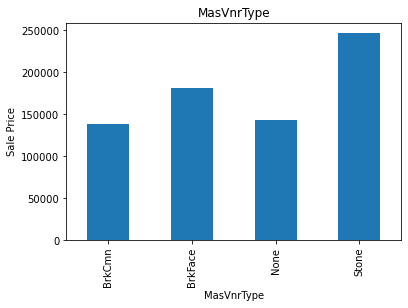

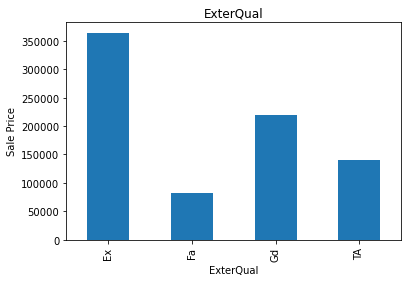

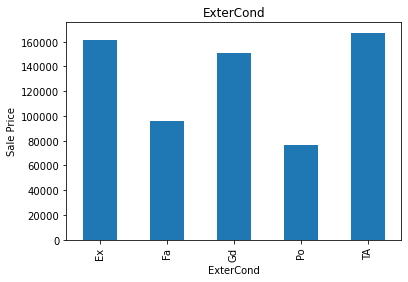

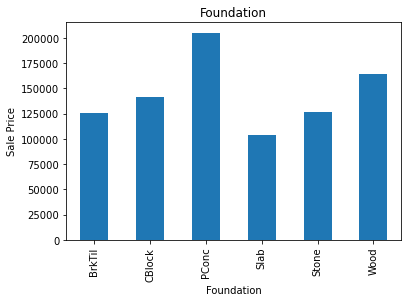

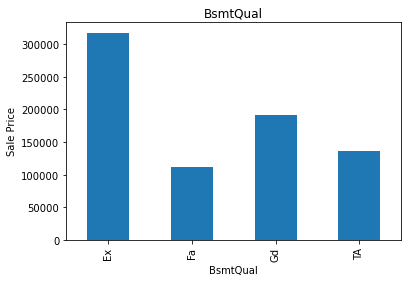

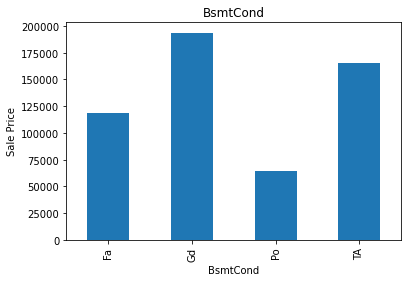

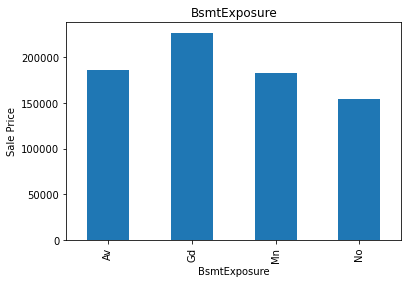

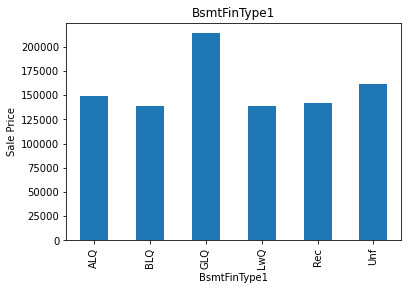

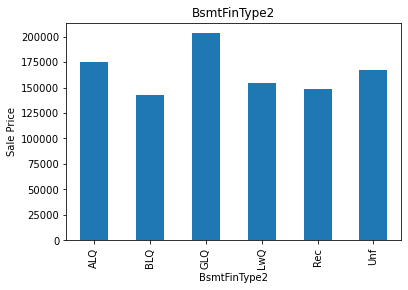

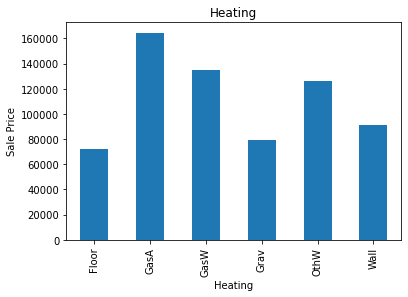

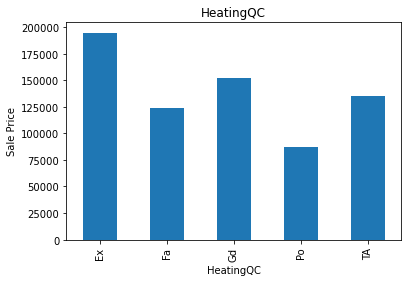

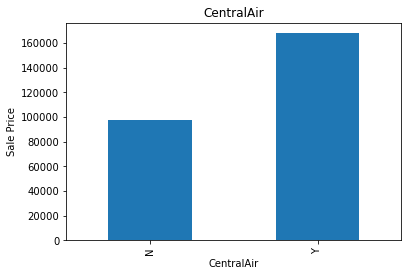

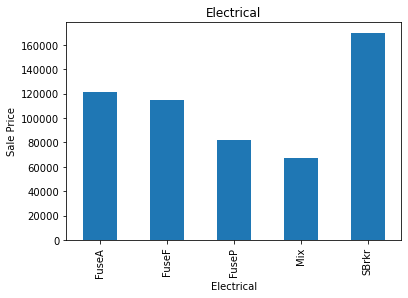

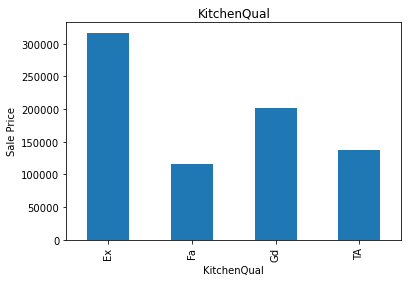

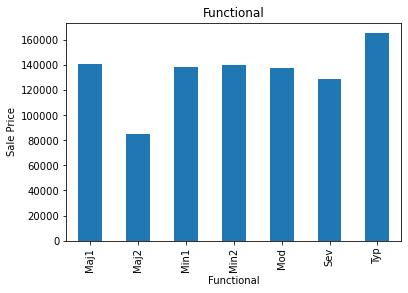

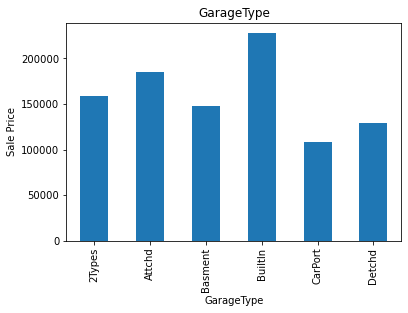

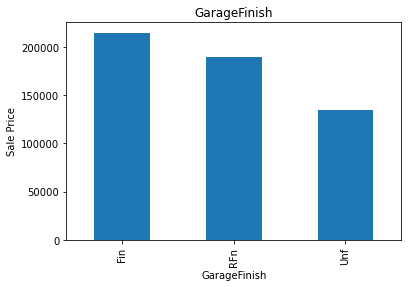

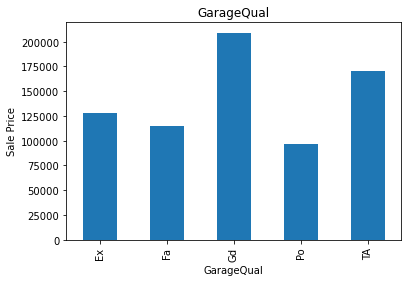

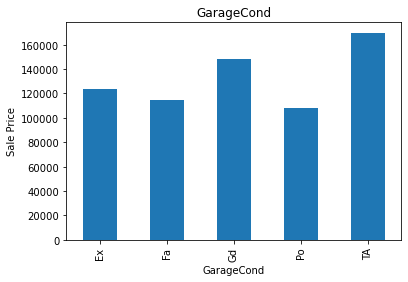

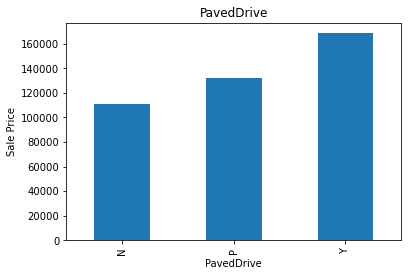

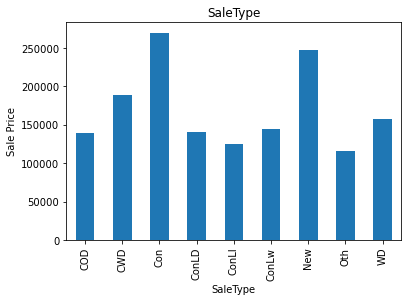

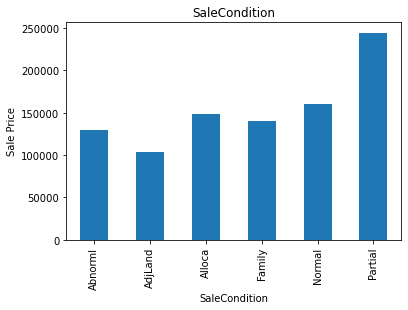

In [24]:
for i in obj:
    data=df.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.title(i)
    plt.show()

### hist plot of all numerical columns

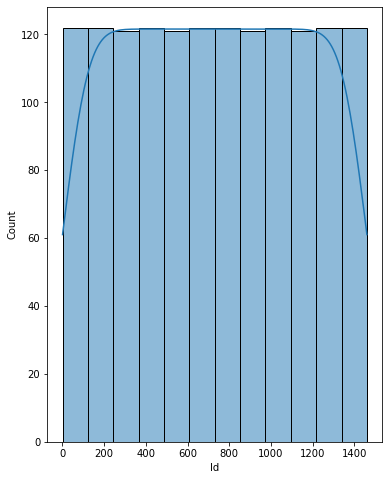

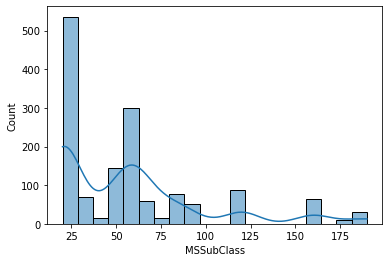

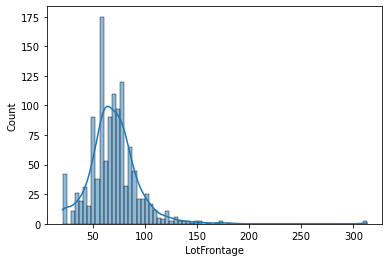

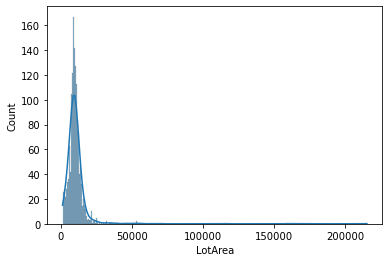

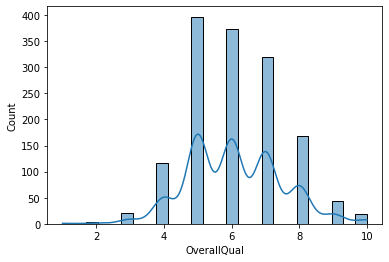

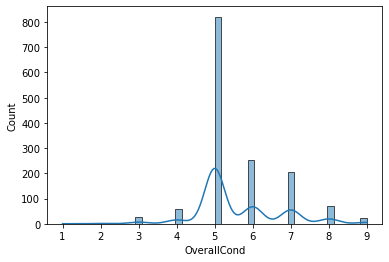

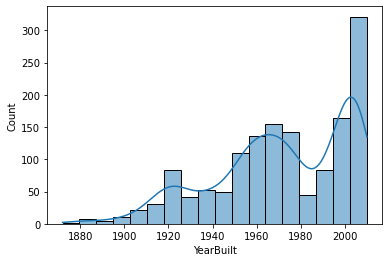

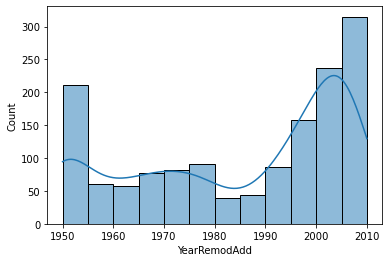

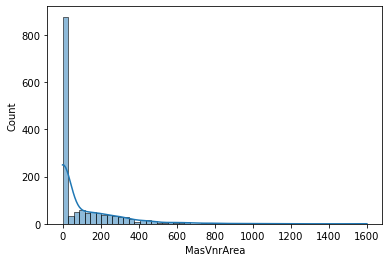

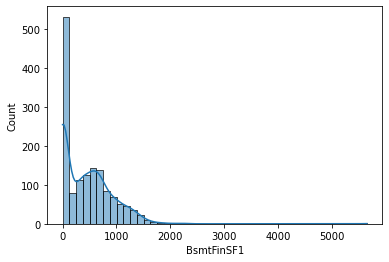

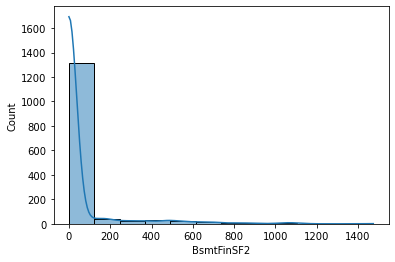

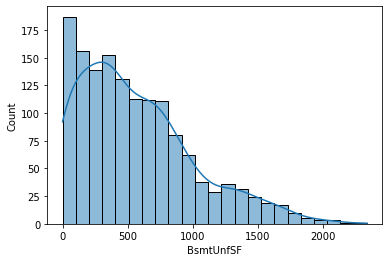

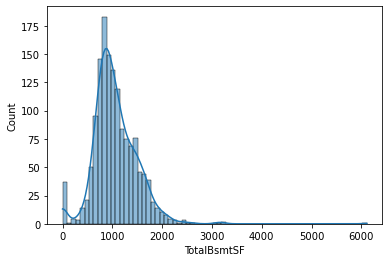

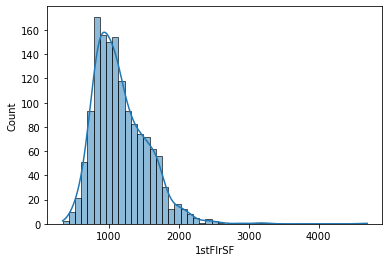

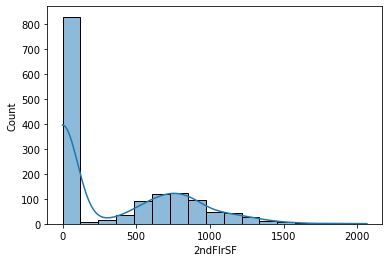

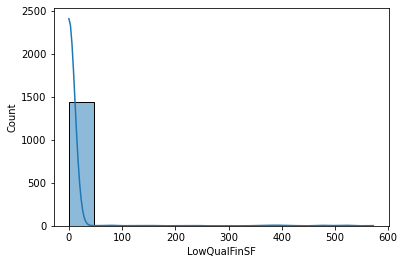

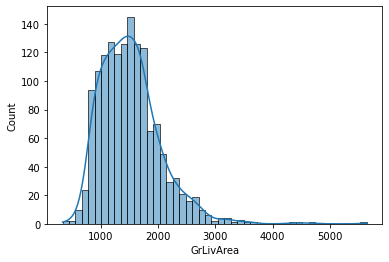

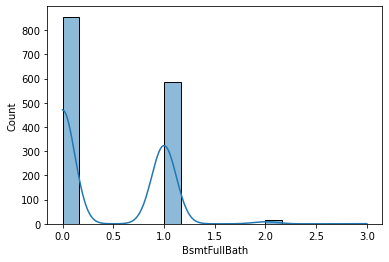

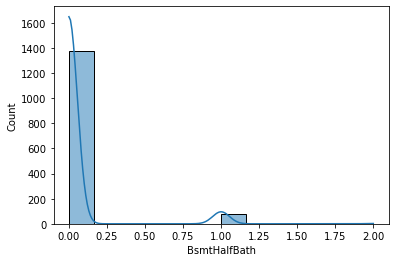

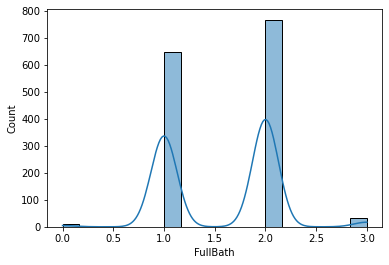

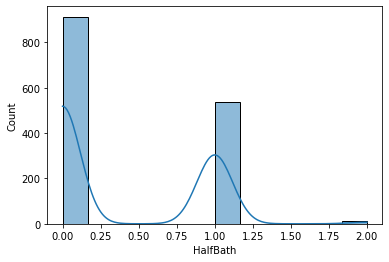

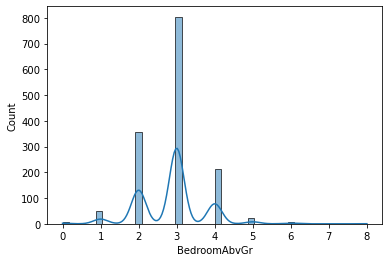

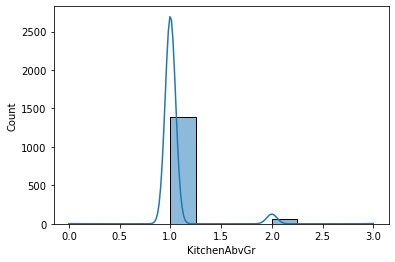

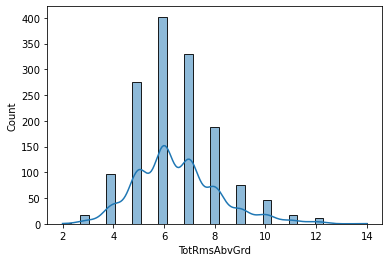

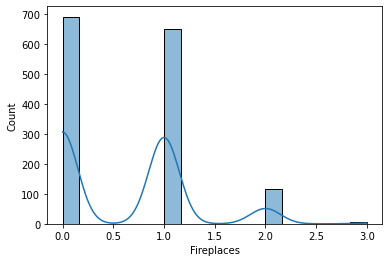

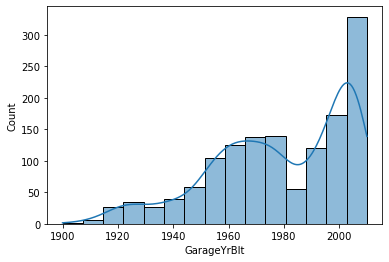

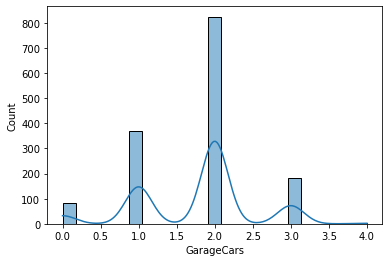

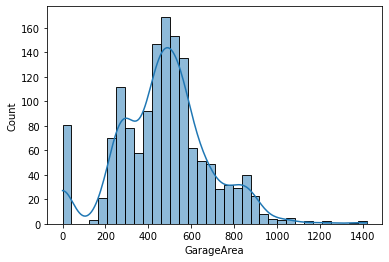

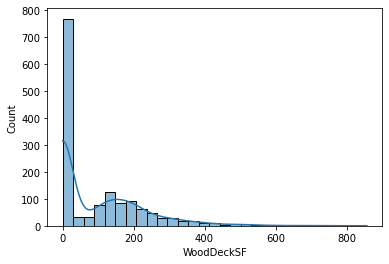

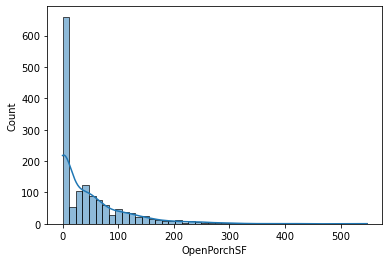

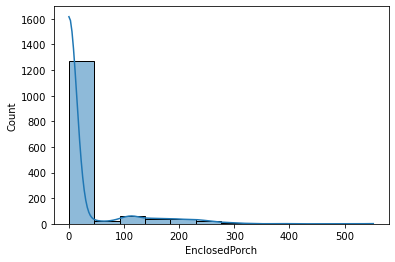

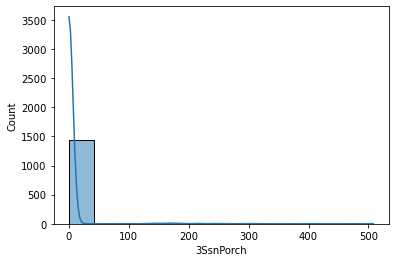

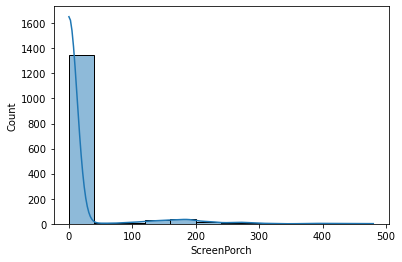

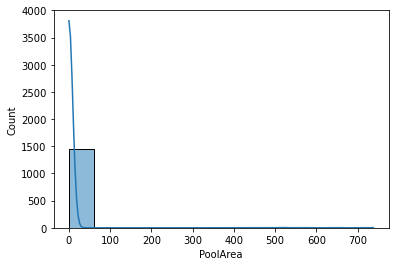

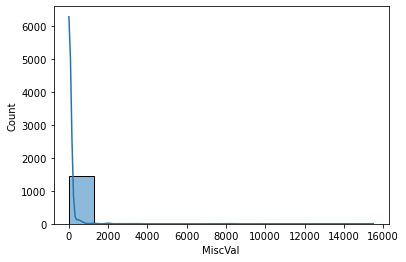

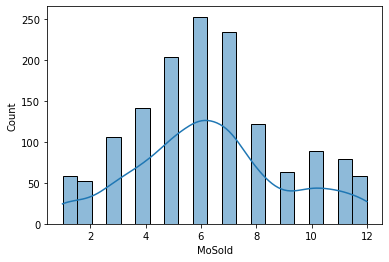

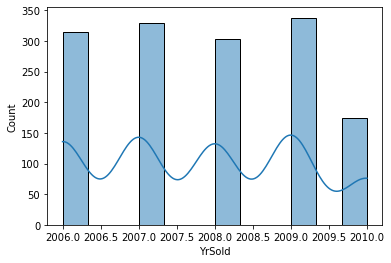

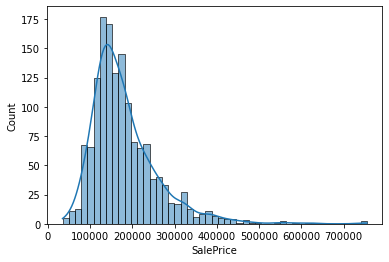

In [25]:
plt.figure(figsize=(6,8))
x = df.drop(obj,axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

### Target variable vs numerical columns

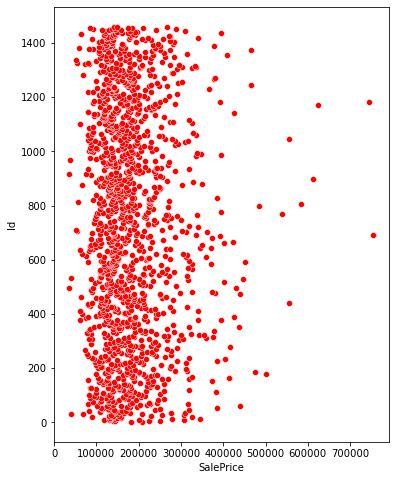

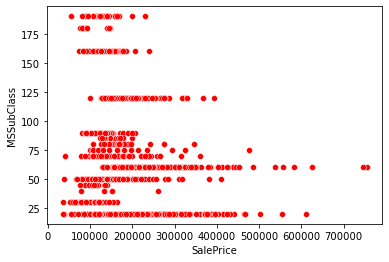

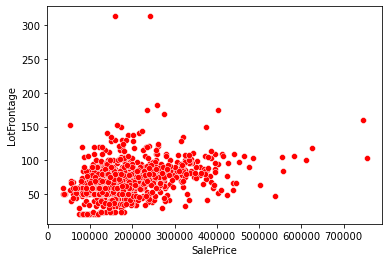

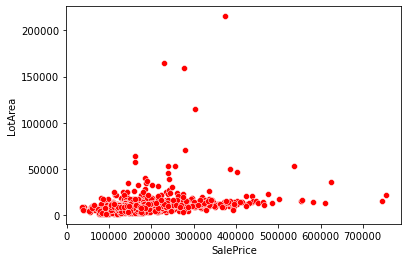

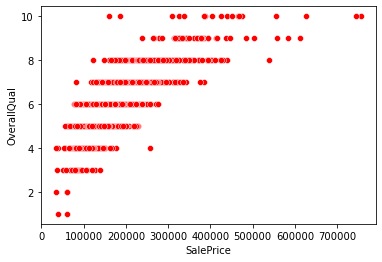

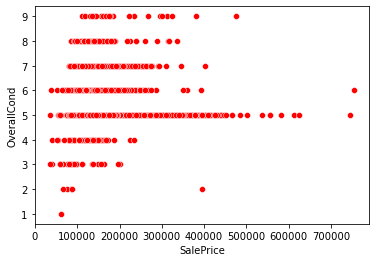

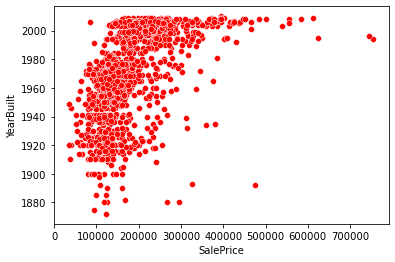

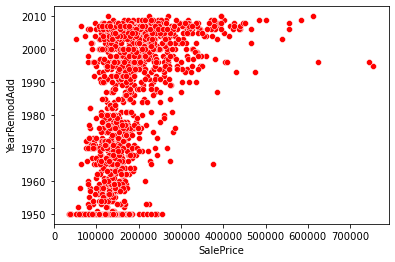

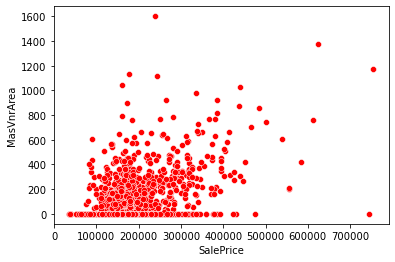

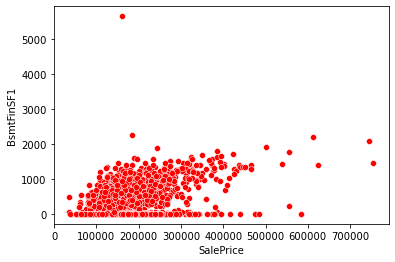

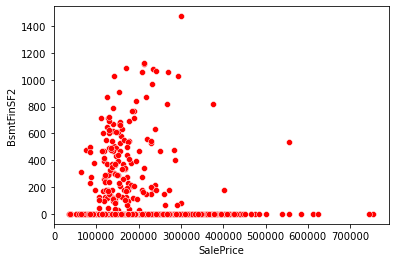

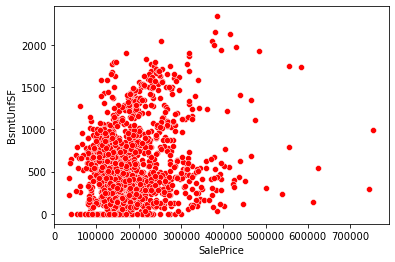

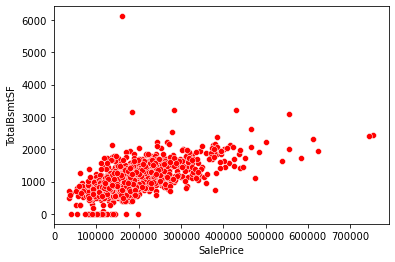

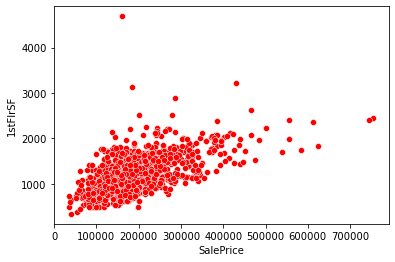

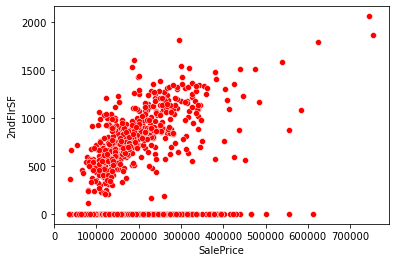

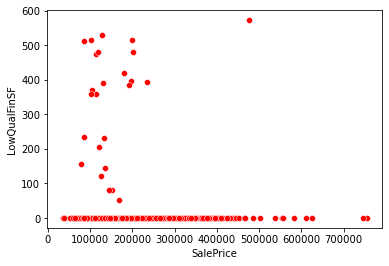

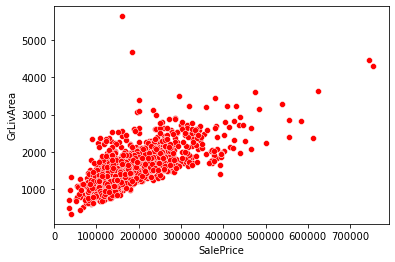

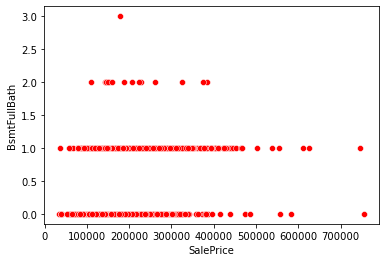

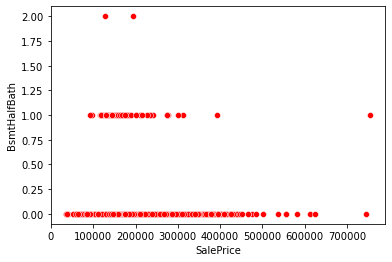

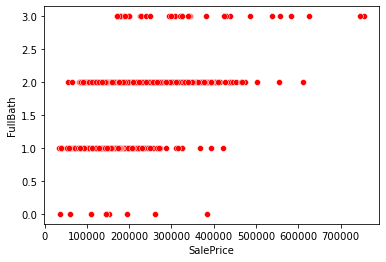

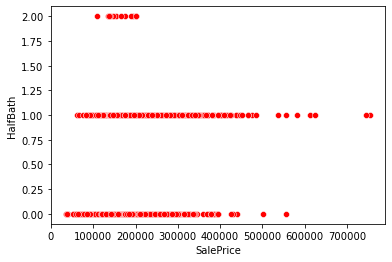

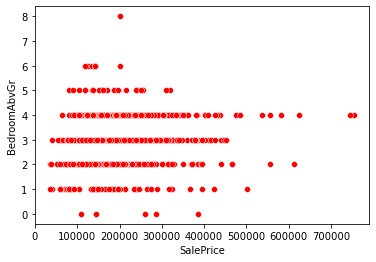

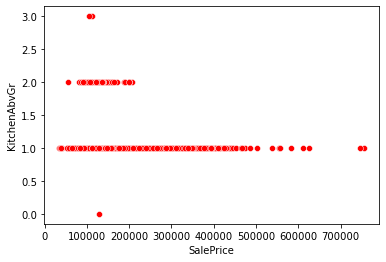

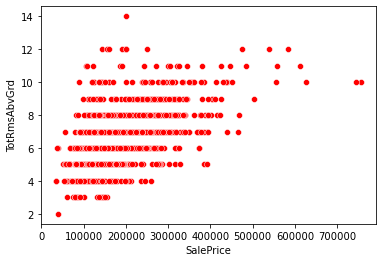

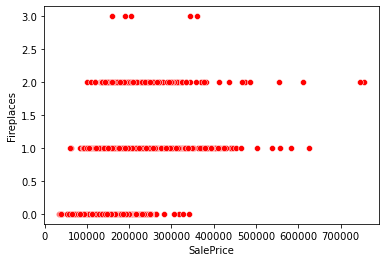

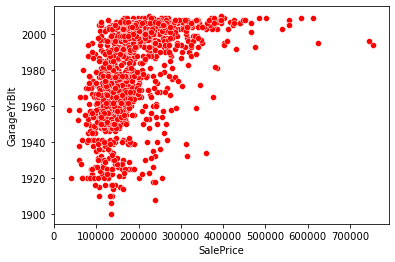

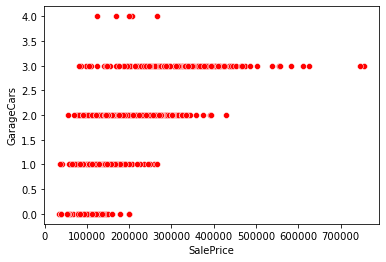

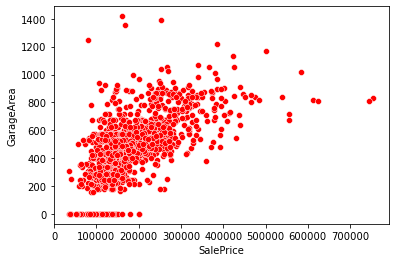

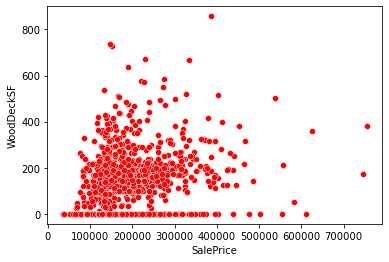

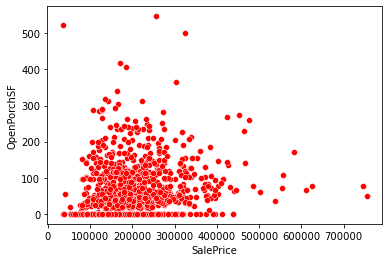

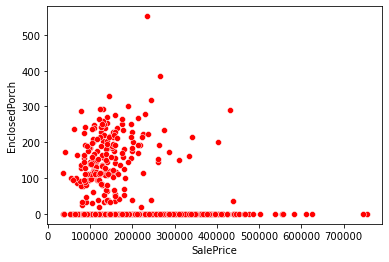

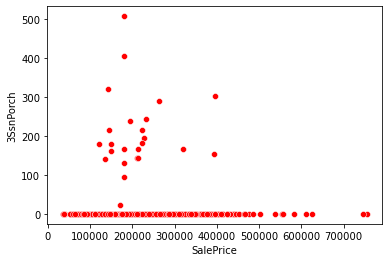

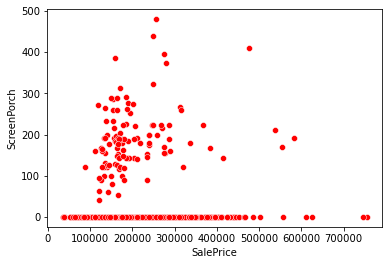

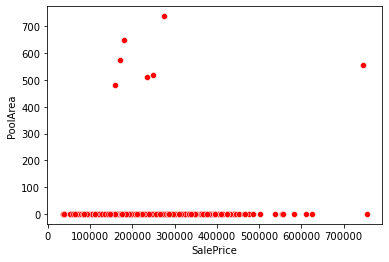

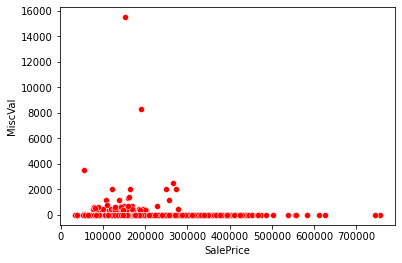

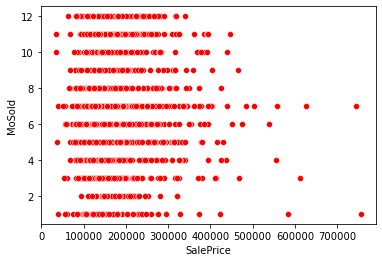

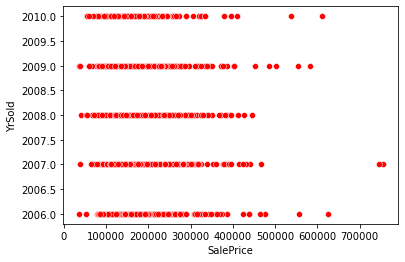

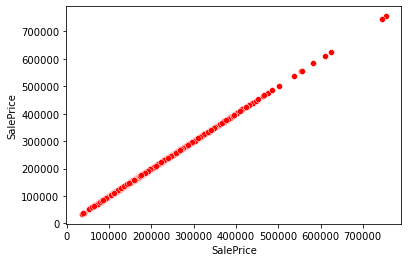

In [26]:
plt.figure(figsize=(6,8))
x = df.drop(obj,axis = 1)
for i in x.columns:
    sns.scatterplot(x = 'SalePrice',y = i,data = x,color = 'Red')
    plt.show()

### Heat map of corelation graph

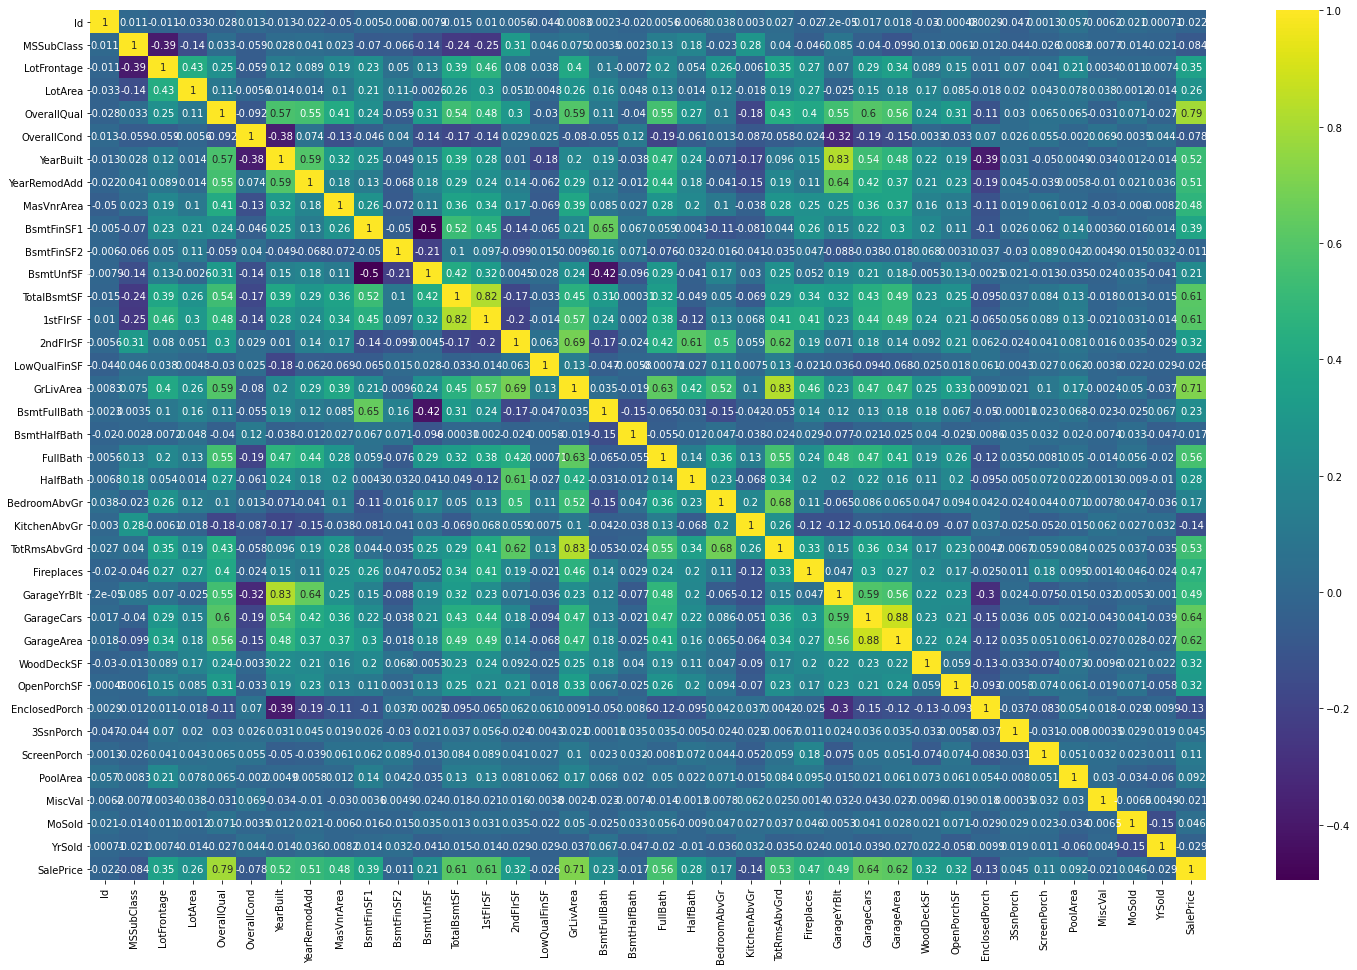

In [27]:
plt.figure(figsize=(25,16))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'viridis')
plt.show()

### Box plot to observe outliers

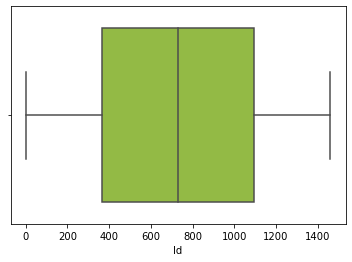

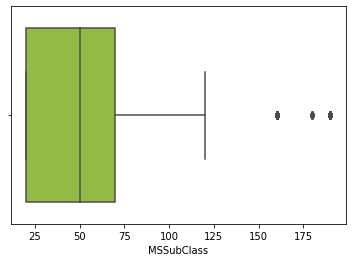

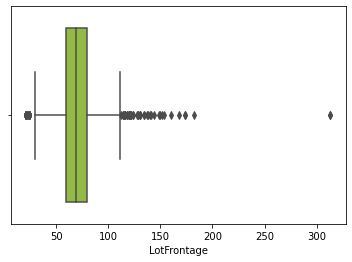

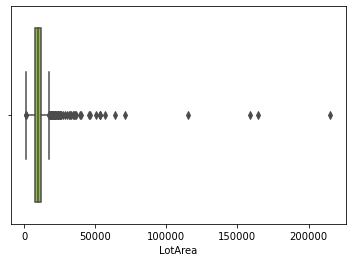

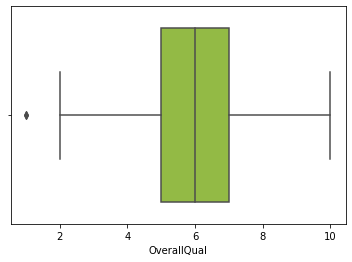

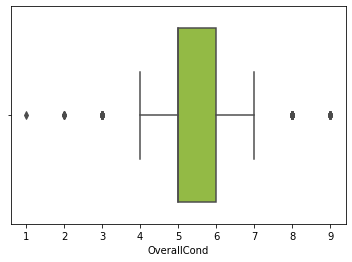

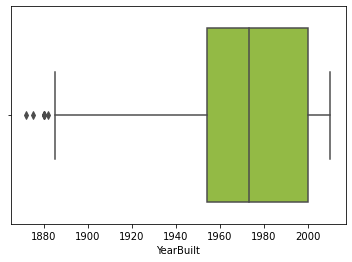

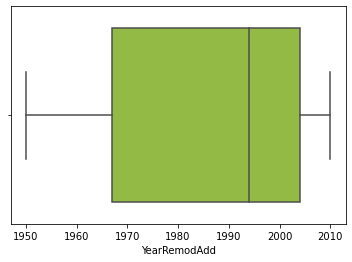

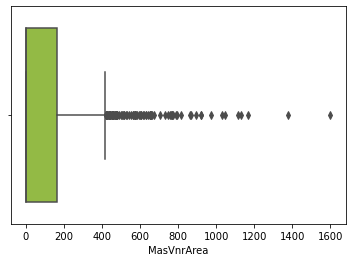

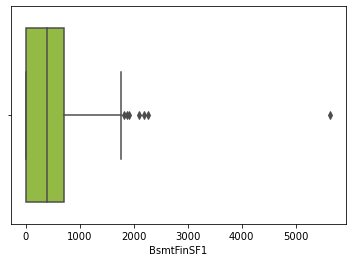

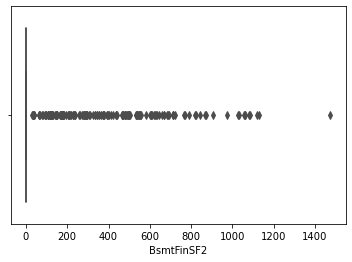

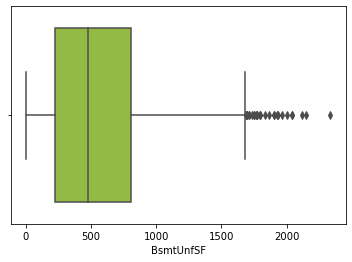

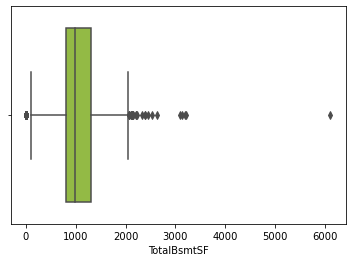

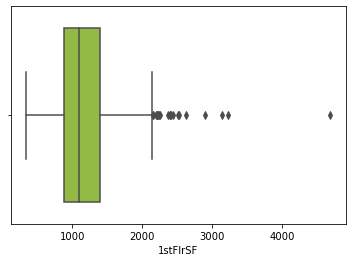

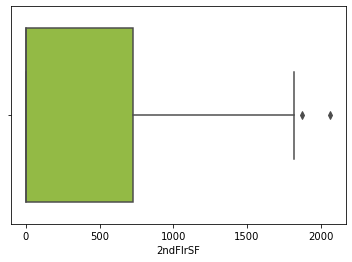

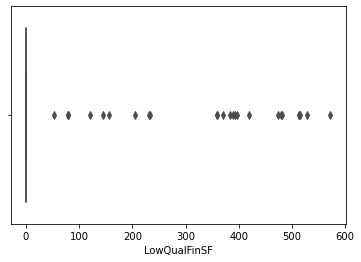

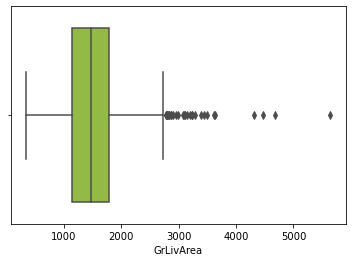

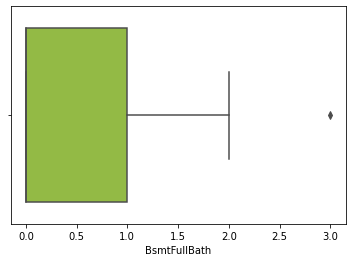

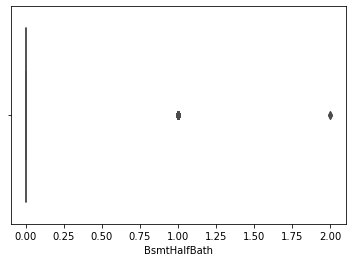

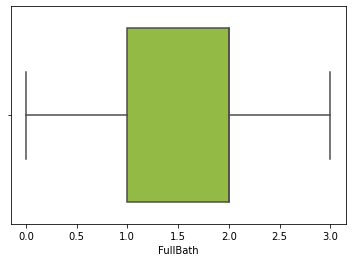

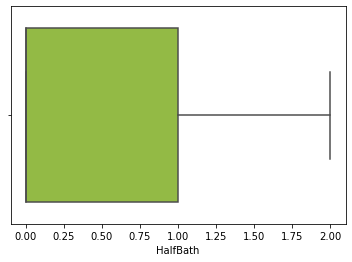

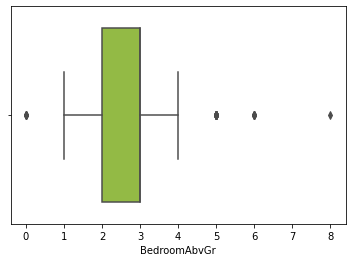

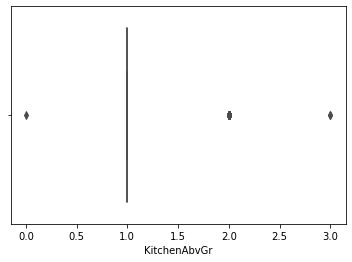

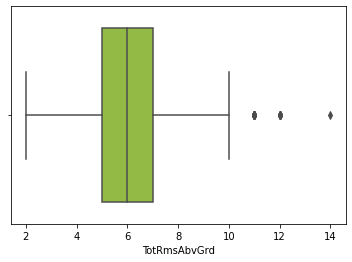

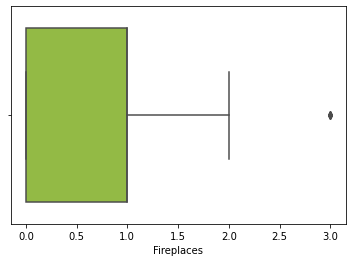

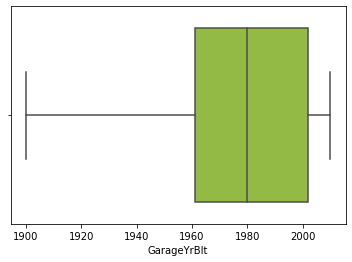

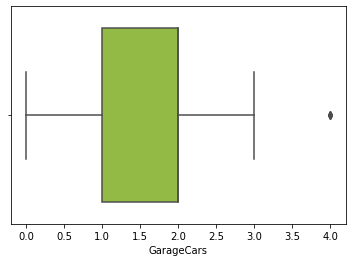

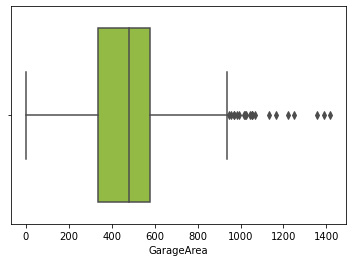

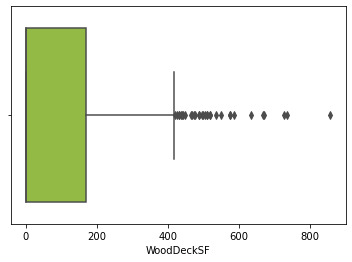

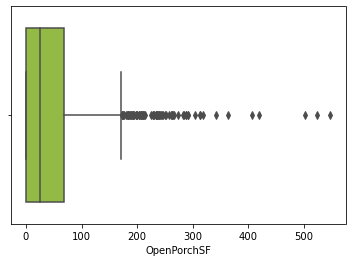

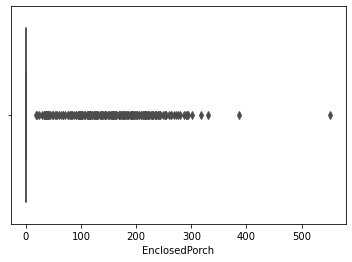

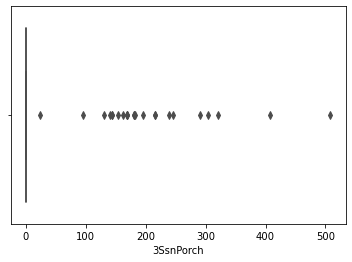

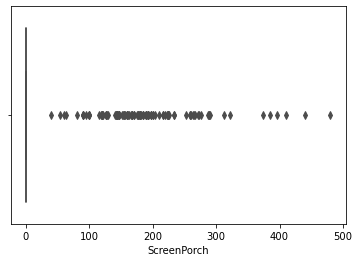

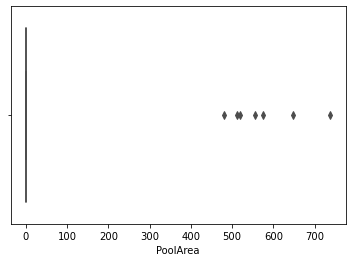

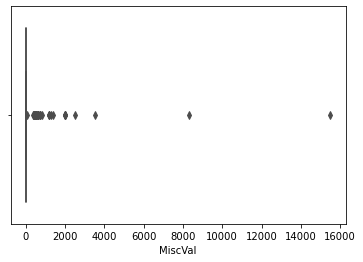

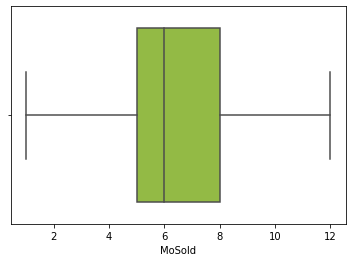

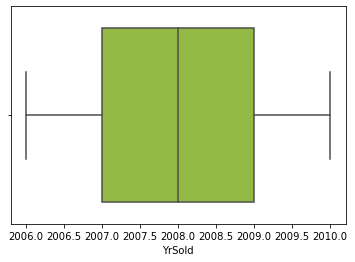

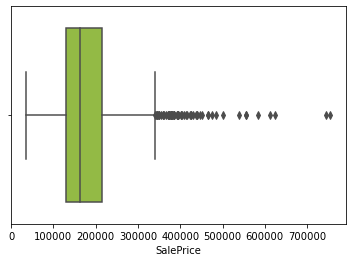

In [28]:
x = df.drop(obj,axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

### violin plot

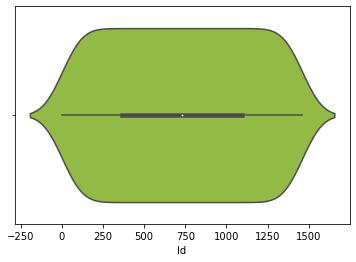

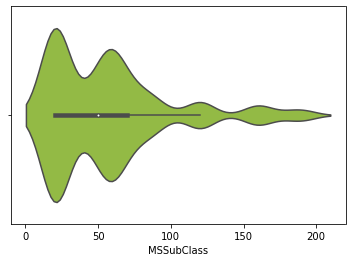

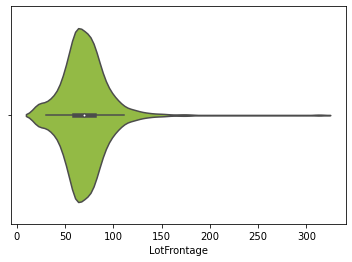

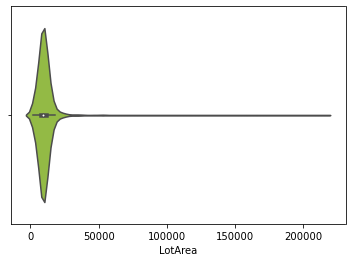

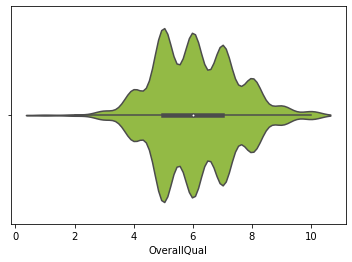

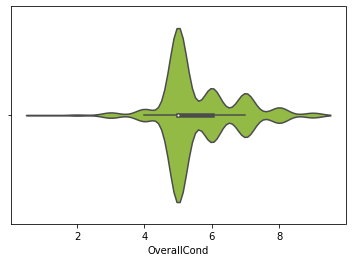

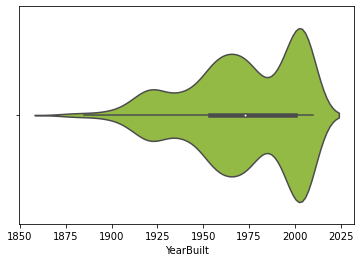

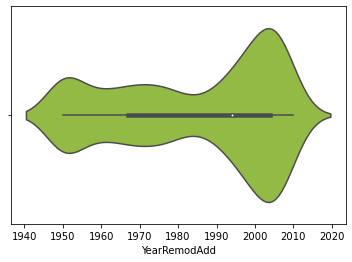

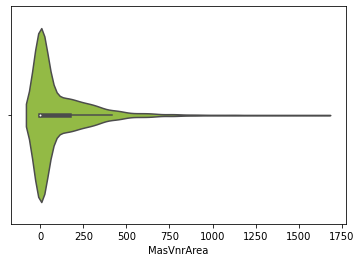

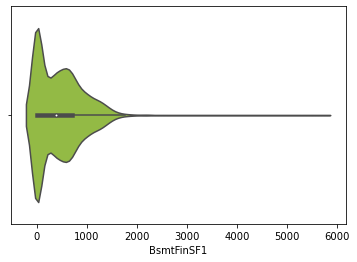

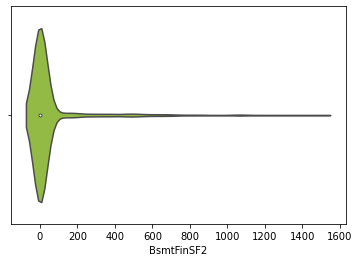

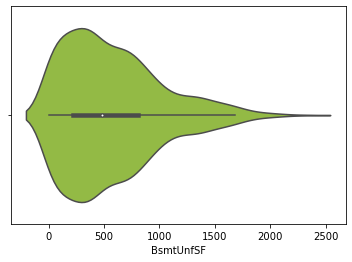

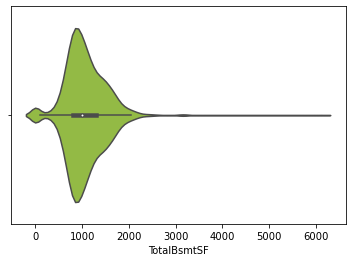

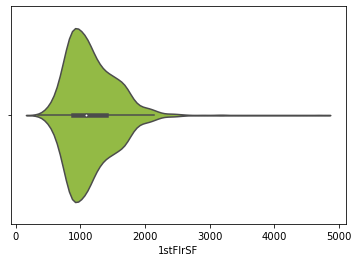

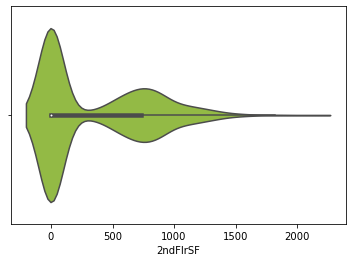

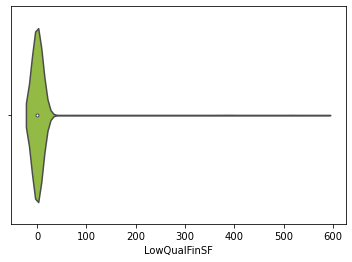

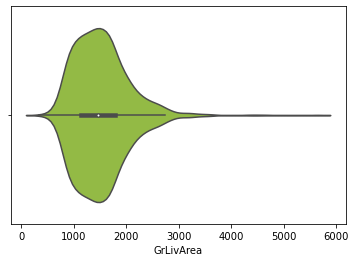

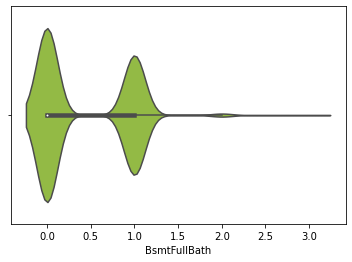

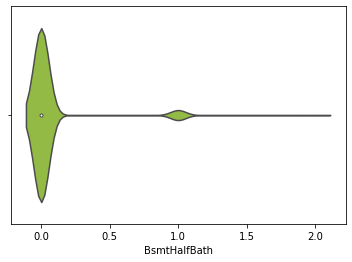

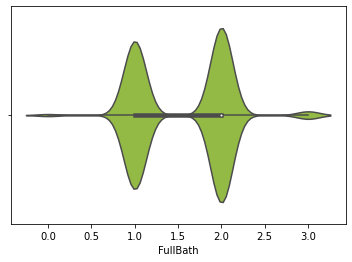

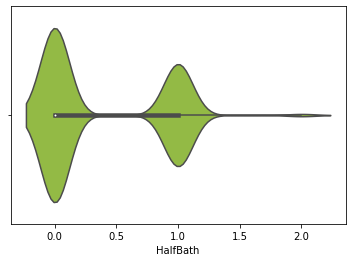

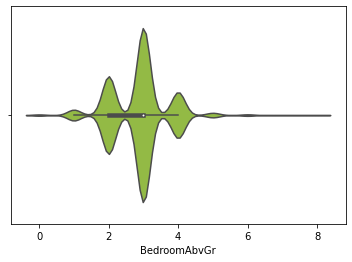

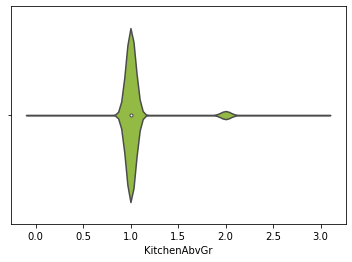

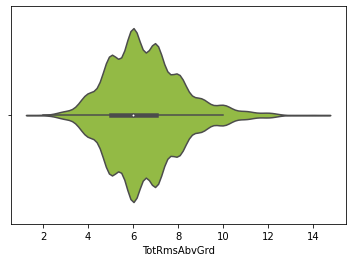

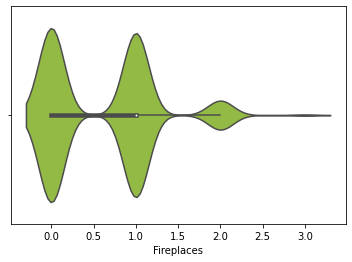

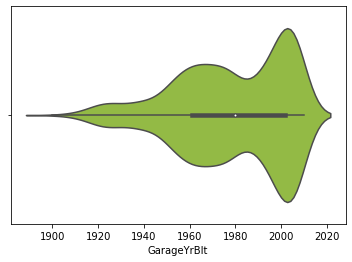

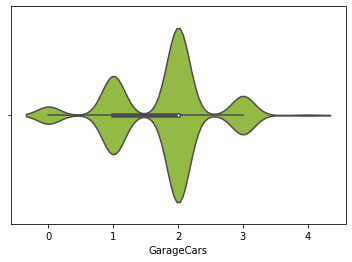

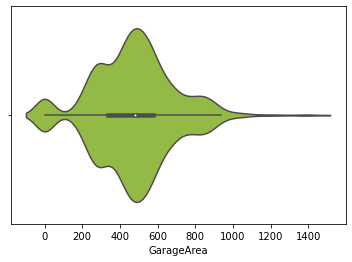

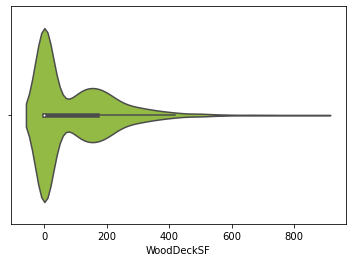

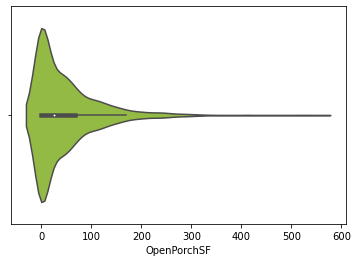

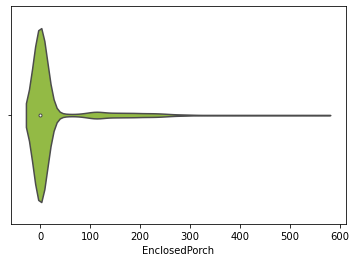

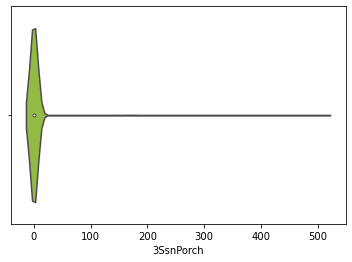

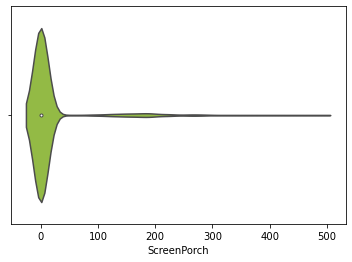

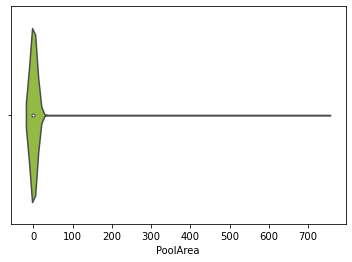

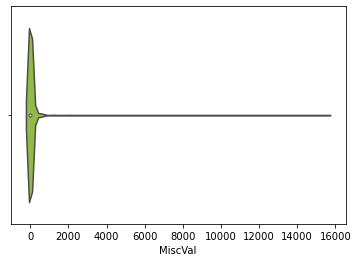

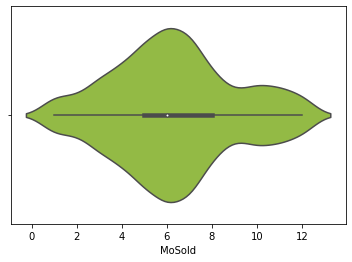

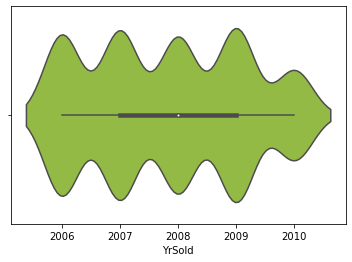

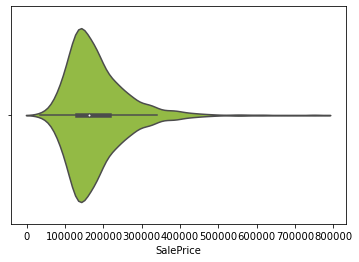

In [29]:
x = df.drop(obj,axis = 1)
for i in x.columns:
    sns.violinplot(x = i, data = x,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

# Count of outliers in each numerical columns

In [30]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x.columns:
    count_outliers(df,i)

No outliers in Id
There are outliers in MSSubClass
Count of outliers are: 103
There are outliers in LotFrontage
Count of outliers are: 88
There are outliers in LotArea
Count of outliers are: 71
There are outliers in OverallQual
Count of outliers are: 2
There are outliers in OverallCond
Count of outliers are: 125
There are outliers in YearBuilt
Count of outliers are: 7
No outliers in YearRemodAdd
There are outliers in MasVnrArea
Count of outliers are: 96
There are outliers in BsmtFinSF1
Count of outliers are: 7
There are outliers in BsmtFinSF2
Count of outliers are: 167
There are outliers in BsmtUnfSF
Count of outliers are: 29
There are outliers in TotalBsmtSF
Count of outliers are: 61
There are outliers in 1stFlrSF
Count of outliers are: 20
There are outliers in 2ndFlrSF
Count of outliers are: 2
There are outliers in LowQualFinSF
Count of outliers are: 26
There are outliers in GrLivArea
Count of outliers are: 31
There are outliers in BsmtFullBath
Count of outliers are: 1
There are outl

# Data Preprocessing

### Filling Null Values

### Filling null values with median if there are outliers in that particular column
### Filling null values with mean if there are no outliers in that particular column
### Filling null vaues with mode if that column is categorical column

In [31]:
for i in is_null:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        if i in a:
                df[i].fillna(df[i].median(),inplace=True)
        else:
            df[i].fillna(df[i].mean(),inplace=True)
    elif df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)

In [32]:
# No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Encoding

In [33]:
df1=pd.get_dummies(data=df,columns=obj,drop_first=True)
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


# Cleaning and preprocessing of Test dataset

## Before applying model clean and setup the test dataset same as train for prediction

In [34]:
df2 = pd.read_csv('test.csv')
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [35]:
#Droping columns with more null values
df2.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis = 1,inplace = True)
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [36]:
c1 = 0
is_null1 = []
for i in df2.columns:
    if df2[i].isnull().sum()>0:
        is_null1.append(i)
        print(i,df2[i].isnull().sum())
        c1 = c1+1
print('Number of columns containing null values are:',c1)

MSZoning 4
LotFrontage 227
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
SaleType 1
Number of columns containing null values are: 28


In [37]:
# 38 categorical columns
obj1 = []
for i in df2.columns:
    if df2[i].dtypes == 'object':
        obj1.append(i)
len(obj1)

38

In [38]:
x1 = df2.drop(obj,axis = 1)
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            k.append(i)
            print('Count of outliers are:',x+y)
global k
k = []
for i in x1.columns:
    count_outliers(df2,i)

No outliers in Id
There are outliers in MSSubClass
Count of outliers are: 104
There are outliers in LotFrontage
Count of outliers are: 100
There are outliers in LotArea
Count of outliers are: 60
There are outliers in OverallQual
Count of outliers are: 2
There are outliers in OverallCond
Count of outliers are: 127
There are outliers in YearBuilt
Count of outliers are: 2
No outliers in YearRemodAdd
There are outliers in MasVnrArea
Count of outliers are: 102
There are outliers in BsmtFinSF1
Count of outliers are: 8
There are outliers in BsmtFinSF2
Count of outliers are: 180
There are outliers in BsmtUnfSF
Count of outliers are: 26
There are outliers in TotalBsmtSF
Count of outliers are: 61
There are outliers in 1stFlrSF
Count of outliers are: 23
There are outliers in 2ndFlrSF
Count of outliers are: 5
There are outliers in LowQualFinSF
Count of outliers are: 14
There are outliers in GrLivArea
Count of outliers are: 44
There are outliers in BsmtFullBath
Count of outliers are: 1
There are ou

In [39]:
for i in is_null1:
    if df2[i].dtype == 'int64' or df2[i].dtype == 'float64':
        if i in k:
                df2[i].fillna(df2[i].median(),inplace=True)
        else:
            df2[i].fillna(df2[i].mean(),inplace=True)
    elif df2[i].dtype == 'object':
        df2[i].fillna(df2[i].mode()[0],inplace=True)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [41]:
df3=pd.get_dummies(data=df2,columns=obj1,drop_first=True)
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


### This is a list which has column names that doesnot present in test dataframe

In [42]:
v = []
for i in df1.columns:
    if i not in df3.columns:
        v.append(i)
v

['SalePrice',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Fa']

# Feature Selection

In [43]:
X = df1.drop(v,axis = 1)#dropping columns that doesnot present in test dataset
Y = df1['SalePrice']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

# Linear Regression prediction

In [44]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [45]:
reg.coef_

array([ 1.64152881e+00, -2.08578935e+01, -1.02622826e+02,  3.29661598e-01,
        7.80971998e+03,  4.61493096e+03,  1.35545964e+02,  5.59352171e+01,
        2.68574096e+01, -2.15234848e+00, -4.76398631e-01, -1.99232435e+00,
       -4.62104232e+00,  1.38550213e+01,  3.40575591e+01, -1.11537623e+01,
        3.67587970e+01,  7.19555327e+03,  2.94286585e+03,  1.15679290e+04,
        1.88220735e+03, -5.50840308e+03, -2.08847200e+04,  2.43050098e+03,
        4.16810232e+03,  5.37651432e+01,  1.56048610e+04, -2.41209789e+01,
        1.25959130e+01,  4.37948405e+00,  1.52633549e+01,  5.26891903e+01,
        2.70054481e+01,  5.69977302e-01, -2.76975818e-01, -7.57943551e+02,
       -7.11293388e+02,  3.34111810e+04,  2.73313452e+04,  3.57031102e+04,
        2.94416004e+04, -8.74864378e+03,  8.09187776e+03, -4.17096593e+04,
        1.03190979e+03,  9.03649408e+03, -3.93631140e+03,  1.30326885e+04,
        1.12847076e+04, -1.21127398e+04, -2.15843508e+04, -1.91107289e+03,
        5.69334659e+03, -

In [46]:
pred = reg.predict(X_test)
pred

array([126909.66912539, 161970.97298443, 332581.22787642, 139960.07742849,
       156315.26704562, 147481.39968845, 158257.69006524, 206966.37999096,
       119011.58721506, 264413.28581087, 277081.56637548, 131790.40420276,
       100957.08837844, 148545.985605  ,  76144.45015777, 314239.4928425 ,
        62345.93718569, 130729.87141584, 122810.87007453, 196663.87800029,
       165447.16924492,  87733.84522042, 117783.38607817, 110972.61662385,
         2302.41924272, 174491.86427863,  92424.29789621, 233610.45853617,
        82639.32628148, 130875.37284683, 195822.26951443, 169589.50308688,
       205070.17059698,  75782.24959403, 176734.23831695, 171953.24374467,
       185780.66247821, 140762.20692971, 152039.09352034, 329456.26091126,
       183890.64693278, 214808.34516236, 222025.16231028, 139899.79334592,
       190316.37480741, 158886.50084535, 154364.15477027, 223250.56188258,
       190754.68287243, 284928.26919647, 222084.39137823, 159211.88620721,
       299956.78657678, 1

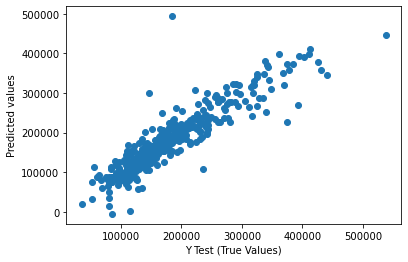

In [47]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [48]:
#r2 score
metrics.explained_variance_score(Y_test,pred)

0.8119664940465199

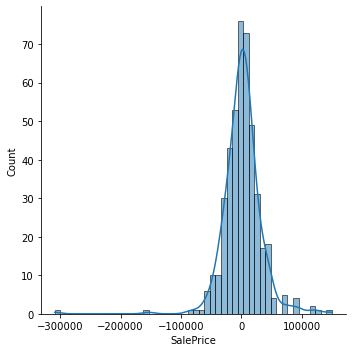

In [49]:
# This shows data is normally distributed but right skewd
sns.displot(Y_test-pred,bins = 50,kde = True)
plt.show()

### This states that 1 unit increase in saleprice will decrease LotFrontage by 102.622826 units

In [50]:
cdf = pd.DataFrame(reg.coef_,X.columns,columns = ['coef'])
cdf

,coef
Id,1.641529
MSSubClass,-20.857893
LotFrontage,-102.622826
LotArea,0.329662
OverallQual,7809.719984
...,...
SaleCondition_AdjLand,-31985.455117
SaleCondition_Alloca,6136.377657
SaleCondition_Family,-241.006883
SaleCondition_Normal,2326.571449


# Regression prediction for test dataset

In [51]:
pred1 = reg.predict(df3)
pred1

array([ 90706.15259902, 142981.96874647, 174923.30264724, ...,
       149273.66122769,  93879.42972734, 221669.7800196 ])

In [52]:
# List contains values of Id columns
f = []
for i in df3.Id:
    f.append(i)


### Displaying regression predictions of test dataset in dataframe

In [53]:
p = pd.DataFrame(data = [pred1])
d = p.transpose()
d.insert(loc = 0, column = 'Id', value=f, allow_duplicates = False)
d.rename(columns={0: 'SalePrice'},inplace = True)
d.set_index('Id')


,SalePrice
Id,
1461,90706.152599
1462,142981.968746
1463,174923.302647
1464,185637.175215
1465,200298.526530
...,...
2915,76013.458584
2916,95719.264511
2917,149273.661228


# Random forest prediction of train dataset

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(n_estimators =40, random_state = 0)
forest.fit(X_train,Y_train)  
Y_pred = forest.predict(X_test)
forest.score(X_test,Y_test)

0.8056585049738513

# Random forest prediction of test dataset

In [55]:
pred2 = forest.predict(df3)
pred2

array([131910.   , 154371.25 , 179509.625, ..., 156533.625, 122391.25 ,
       221761.   ])

In [56]:
p = pd.DataFrame(data = [pred2])
d = p.transpose()
d.insert(loc = 0, column = 'Id', value=f, allow_duplicates = False)

## Displaying random forest predictions of test dataset in dataframe

In [57]:
d.rename(columns={0: 'SalePrice'},inplace = True)
d.set_index('Id')

,SalePrice
Id,
1461,131910.000
1462,154371.250
1463,179509.625
1464,182179.625
1465,207500.000
...,...
2915,87866.775
2916,92357.500
2917,156533.625


# Xg boost prediction on train data

In [59]:
import xgboost as xg
xg_reg = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 50, seed = 123)
xg_reg.fit(X_train, Y_train)
pred = xg_reg.predict(X_test)
print(xg_reg.score(X_test, Y_test))

0.7903698059297015


# Xg boost prediction on test data

## Displaying random forest predictions of test dataset in dataframe

In [60]:
p = pd.DataFrame(data = [pred2])
d = p.transpose()
d.insert(loc = 0, column = 'Id', value=f, allow_duplicates = False)
d.rename(columns={0: 'SalePrice'},inplace = True)
d.set_index('Id')

,SalePrice
Id,
1461,131910.000
1462,154371.250
1463,179509.625
1464,182179.625
1465,207500.000
...,...
2915,87866.775
2916,92357.500
2917,156533.625


# More Machine Learning Techniques

# Ridge Regression

In [61]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
R=Ridge(alpha=0.1)
R.fit(X_train,Y_train)
y_pred1=R.predict(X_test)

In [62]:
print("R2 score",r2_score(Y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred1)))

R2 score 0.8186046606541615
RMSE 32137.88134215393


# Lasso Regression

In [63]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print(r2_score(Y_test, pred_test_lasso))

32738.378798984035
0.8117625732536925


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287394899046.0819, tolerance: 671016589.0684764
  model = cd_fast.enet_coordinate_descent(


# Elastic Regression

In [64]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.1)
model_enet.fit(X_train, Y_train) 
pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_enet)))
print(r2_score(Y_test, pred_test_enet))

29996.051034887005
0.8419771805716695


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465834382497.1122, tolerance: 671016589.0684764
  model = cd_fast.enet_coordinate_descent(
